sssssssssssss
{'func': ['/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', '/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'], 'confounds': ['/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv', '/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_desc-reducedConfounds_regressors.tsv', '/Users/dragon/nilearn_data/development_fmri/development_fmri/sub-pixar002_task-pixar_desc-reducedConfounds_regressors.tsv'], 'phenotypic': array([('sub-pixar123', 27.06      , 'Adult', 'adult', 'F', 'R'),
       ('sub-pixar001',  4.77481177, '4yo', 'child', 'M', 'R'),
       ('sub-pixar002', 

/Users/dragon/opt/anaconda3/envs/py37/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Parcellations] computing ward
Ward agglomeration 1000 clusters: 3.63s
sssss (50, 59, 50, 168)
(50, 59, 50)
niuniu
success
(50, 59, 50)
(168, 5545)


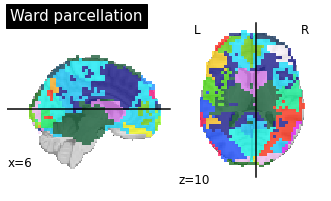

In [57]:
from matplotlib import patches, ticker
import matplotlib.pyplot as plt
from nilearn.image import get_data
import numpy as np
from nilearn.image import mean_img, index_img
from nilearn import plotting
import time
import nilearn
from nilearn.regions import Parcellations
from nilearn import datasets
dataset = datasets.fetch_development_fmri(n_subjects=3)

print('sssssssssssss')
print(dataset)
print('sssssssssssss')
import nibabel as nib


# print basic information on the dataset
print('First subject functional nifti image (4D) is at: %s' %
      dataset.func[0])  # 4D data

# Computing ward for the first time, will be long... This can be seen by
# measuring using time
start = time.time()

# Agglomerative Clustering: ward

# We build parameters of our own for this object. Parameters related to
# masking, caching and defining number of clusters and specific parcellations
# method.
ward = Parcellations(method='ward', n_parcels=100,
                     standardize=False, smoothing_fwhm=2.,
                     memory='nilearn_cache', memory_level=1,
                     verbose=1)

# Call fit on functional dataset: single subject (less samples).
ward.fit(dataset.func)
print("Ward agglomeration 1000 clusters: %.2fs" % (time.time() - start))

img_1 = nib.load(dataset.func[0])
print('sssss',str(img_1.shape))
ward_labels_img = ward.labels_img_
print(ward_labels_img.shape)

# Now, ward_labels_img are Nifti1Image object, it can be saved to file
# with the following code:
ward_labels_img.to_filename('ward_parcellation.nii.gz')


first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation",
                               display_mode='xz')

# Grab cut coordinates from this plot to use as a common for all plots
cut_coords = first_plot.cut_coords
print('niuniu')

a = np.array(ward_labels_img.dataobj)
#print(a)
print('success')

b = a
vals = np.array([1])
inds = b == vals[:, None, None, None]
b[~np.any(inds, axis = 0)] = 0

print(b.shape)
new_image = nib.Nifti1Image(b, affine=img_1.affine)
#new_image.affine = dataset.func[0].affine
#new_image.affine = np.asarray([[   4,    0,    0,  -96],[   0,    4,    0, -132],[   0,    0,   4, -78], [   0,    0,   0,    1]])
#print(new_image)
masked_data=nilearn.masking.apply_mask(dataset.func[0],new_image)
print(masked_data.shape)

In [60]:
from matplotlib import patches, ticker
import matplotlib.pyplot as plt
from nilearn.image import get_data
import numpy as np
from nilearn.image import mean_img, index_img
from nilearn import plotting
import time
import nilearn
from nilearn.regions import Parcellations
from nilearn import datasets
#dataset = datasets.fetch_development_fmri(n_subjects=3)

import nibabel as nib

#data = nib.load('/Users/dragon/Downloads/BREATHE/fmri/s106/final.feat/filtered_func_data.nii.gz')
#data2 = nib.load('/Users/dragon/Downloads/BREATHE/fmri/s109/final.feat/filtered_func_data.nii.gz')
#print(data.dataobj)
#print(data2.dataobj)

#data=np.asarray([data.dataobj,data2.dataobj])

#data = nib.Nifti1Image(data, affine=data2.affine)

start = time.time()

data=['/Users/dragon/Downloads/BREATHE/fmri/s106/final.feat/filtered_func_data.nii.gz','/Users/dragon/Downloads/BREATHE/fmri/s109/final.feat/filtered_func_data.nii.gz']

ward = Parcellations(method='ward', n_parcels=100,
                     standardize=False, smoothing_fwhm=2.,
                     memory='nilearn_cache', memory_level=1,
                     verbose=1)

# Call fit on functional dataset: single subject (less samples).
ward.fit(data)

print("Ward agglomeration 1000 clusters: %.2fs" % (time.time() - start))

img_1 = data
print('sssss',str(img_1.shape))
ward_labels_img = ward.labels_img_
print(ward_labels_img.shape)

# Now, ward_labels_img are Nifti1Image object, it can be saved to file
# with the following code:
ward_labels_img.to_filename('ward_parcellation.nii.gz')


first_plot = plotting.plot_roi(ward_labels_img, title="Ward parcellation",
                               display_mode='xz')

# Grab cut coordinates from this plot to use as a common for all plots
cut_coords = first_plot.cut_coords
print('niuniu')

a = np.array(ward_labels_img.dataobj)
#print(a)
print('success')

b = a
vals = np.array([1])
inds = b == vals[:, None, None, None]
b[~np.any(inds, axis = 0)] = 0

print(b.shape)
new_image = nib.Nifti1Image(b, affine=img_1.affine)
#new_image.affine = dataset.func[0].affine
#new_image.affine = np.asarray([[   4,    0,    0,  -96],[   0,    4,    0, -132],[   0,    0,   4, -78], [   0,    0,   0,    1]])
#print(new_image)
masked_data=nilearn.masking.apply_mask(data2,new_image)
print(masked_data.shape)

[MultiNiftiMasker.fit] Loading data from [/Users/dragon/Downloads/BREATHE/fmri/s109/final.feat/filtered_func_data.nii.gz, /Users/dragon/Downloads/BREATHE/fmri/s106/final.feat/filtered_func_data.nii.gz]
[MultiNiftiMasker.fit] Computing mask


ValueError: All masks should have the same affine